<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [57]:
# IMPORT LIBRARIES
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


### 1. Import the data

In [58]:
ais = pd.read_csv('../../DATA/ais.csv').drop("Unnamed: 0", axis=1)

### 2. Do some EDA of relationships between features.

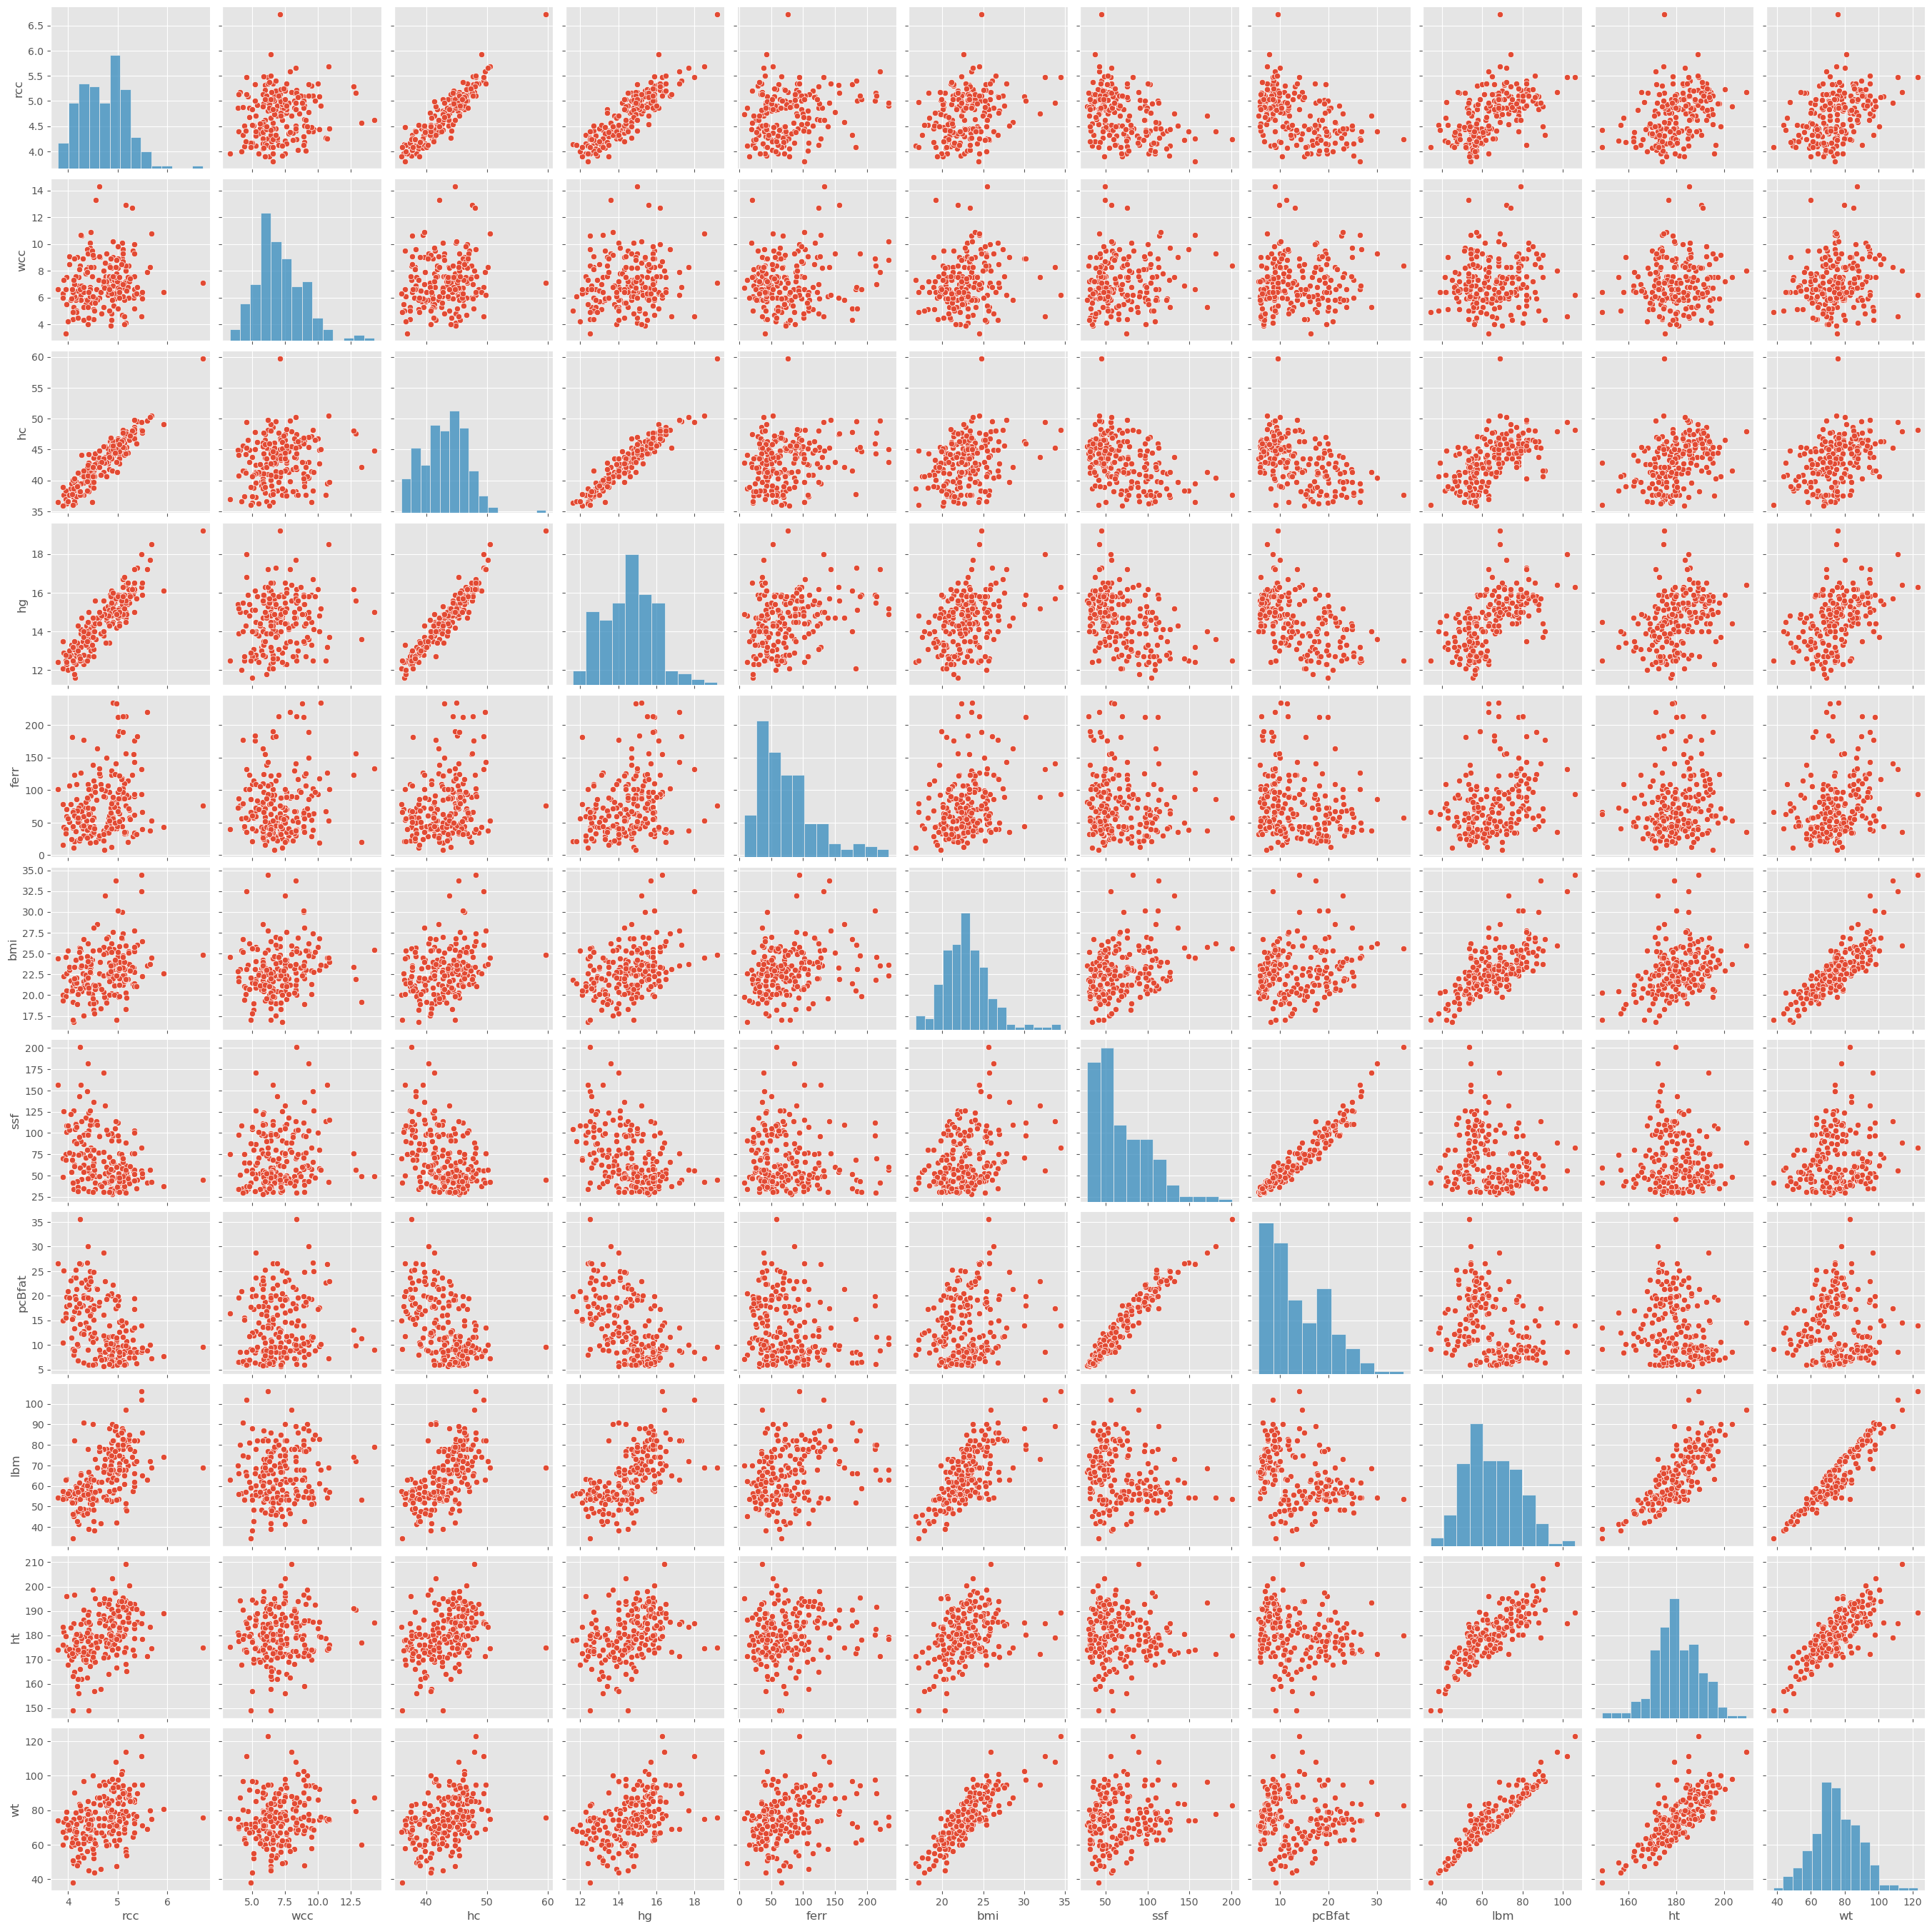

In [59]:
sns.pairplot(ais)

In [60]:
ais['sex'].value_counts()

m    102
f    100
Name: sex, dtype: int64

In [61]:
ais.dtypes

rcc       float64
wcc       float64
hc        float64
hg        float64
ferr        int64
bmi       float64
ssf       float64
pcBfat    float64
lbm       float64
ht        float64
wt        float64
sex        object
sport      object
dtype: object

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [62]:
X = ais.drop(["sex", "sport"], axis=1)

In [64]:
scaler = MinMaxScaler()
ais_scaled = scaler.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [65]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(ais_scaled)

KMeans(n_clusters=2)

In [66]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ais_scaled)

KMeans(n_clusters=4)

### 5. Get the labels for the models

In [67]:
# ANSWER
labels_2 = kmeans.labels_
print(labels_2)


[3 3 3 3 1 1 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 3 1 3
 3 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 3 1 1 3 3 1 1 1 1 1 1 2 0 3 3 3 3
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 2 0 2
 2 0 0 2 2 0 0 0 0 1 0 2 2 0 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 1 2 2 2 0 0 2 2
 2 2 2 2 1 2 1 2 2 2 2 0 2 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 0 0 0 2 2 0 0 0 0
 0 0 2 0 0 2 0 2 0 0 0 2 0 2 2 0 2]


### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [68]:
# ANSWER
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ais_scaled)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Shivraj\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

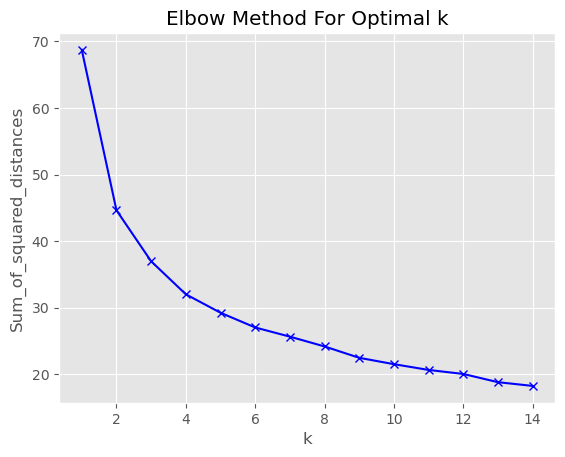

In [69]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

Each time, compare to the actual species classification.

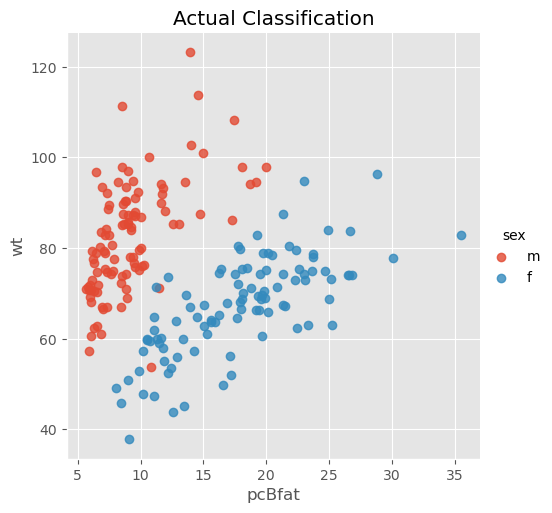

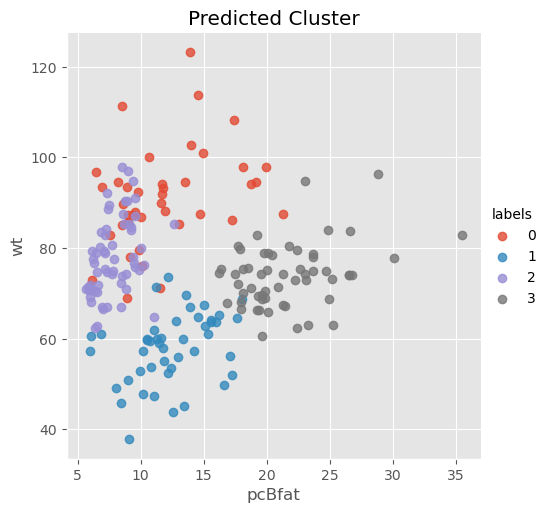

In [71]:
ais_labels = ais
ais_labels['labels'] = labels_2

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='sex', 
           hue_order=['m', 'f'], fit_reg=False)
plt.title('Actual Classification')

sns.lmplot(x='pcBfat', y='wt', data=ais_labels, hue='labels', fit_reg=False)
plt.title('Predicted Cluster')
plt.show();

[[11.9698     93.252     ]
 [21.04362069 72.80862069]
 [11.82595238 56.57142857]
 [ 7.93826923 74.80961538]]


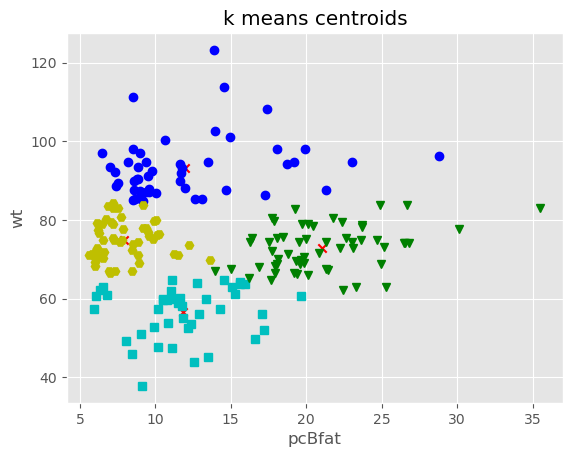

In [72]:
x1 = np.array(ais['pcBfat'])
x2 = np.array(ais['wt'])

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'c', 'y']
markers = ['o', 'v', 's', 'H']

# KMeans algorithm 
K = 4
kmeans_model = KMeans(n_clusters=K).fit(X)

print(kmeans_model.cluster_centers_)
centers = np.array(kmeans_model.cluster_centers_)

plt.plot()
plt.title('k means centroids')
plt.xlabel('pcBfat')
plt.ylabel('wt')

for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')

plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()



---



---



> > > > > > > > > Â© 2022 Institute of Data


---



---



